Let's say we want to get some fruits, and we come up with two **ideas**:

1. Planting apples and oranges in backyard.
2. Migrating to warmer area.

How to compare them?

Let's describe what we expect to add, and what we expect to get from **plans** based on them, expressed in terms of **steps**:

<u>Plan 1:</u>

1. extracting seeds
2. planting field
3. waiting (for crops to grow)

![planting](http://blog.mindey.com/wp-content/uploads/2014/12/soil-with-plant-sprout-300x200.jpg)

<u>Plan 2:</u>

1. waiting (for right conditions to travel)
2. travel (to where the fruis are)

![traveling](http://blog.mindey.com/wp-content/uploads/2014/12/orange-trees-near-ocean-300x200.jpg)

In order to determine, which plan is better, we have to give some assumptions. So, let's say our first plan is to invest into getting **20** oranges and **30** apples, extract their seeds, plant a field, care for it for **10 years**, and wait for another **1 year** to get the yield of **5000 oranges** and **10000 apples**. And let's say that our second plan is to invest **6 months** of waiting for **right conditions to travel** until, namely, let's say a person has a job, and has to accumulate the amount of money needed to **survive a 30 day trip**, and then actually invest that 30 day trip to travel into the region, where he can get **10000 bananas** and **50000 oranges** free in nature. Also, assume that the market price of all the things mentioned are known in various currencies:

1. apple seeds: 0.15**usd** per item
2. apple trees: 200**eur** per item
3. apples: 500**jpy** per item
4. orange seeds: 0.1**usd** per item
5. orange trees: 150**usd** per item
6. oranges: 1.3**cny** per item
7. bananas: 0.25**usd** per item

Okay, so let's now express it in terms of StepIO/PlanDF language:

In [1]:
import plandf

In [2]:
# extracting seeds ('orange seeds', 200), ('apple seeds': 150)
# planting field
# waiting (for crops to grow)

growing_apples_and_oranges = [

    ('extracting seeds: 1; time: 0.5@1h; oranges: 20@1.3cny; apples: 30@500jpy',   
        'orange seeds: 200; apple seeds: 150@0.15usd'),

    ('planting field: 1; time: 3653.5@24h; day of labor: 1; years of care: 10',
         'orange trees: 50@150usd; apple trees: 100@200eur'),

    ('waiting (for crops to grow): 1; time: 365.25@24h; years of waiting: 1',
         'oranges: 5000@1.3cny; apples: 10000@500jpy')
]

# waiting (for right conditions to travel)
# travel (to where the fruis are)

migrating_to_warmer_latitude = [
    ('time: 6@720h; months of waiting: 6',
         'for right conditions to travel: 1; ability to survive a 30 day travel: 1'),

    ('time: 30@24h; days travelling: 30',
         'bananas: 10000@0.25usd; apples: 0@500jpy; oranges: 50000@1.3cny')
]

In [3]:
import pandas as pd
conversion_rates = pd.DataFrame({'h':   [25.39],
                                 'usd': [1.],
                                 'eur': [1.12565],
                                 'cny': [0.153078],
                                 'rub': [0.012709],
                                 'jpy': [0.008832]})

#conversion_rates = conversion_rates/conversion_rates['h']

In [4]:
planting = plandf.read(growing_apples_and_oranges, conversion_rates)
planting

,worst,mean,best
time,,,
0.0,0.000000,0.000000,0.000000
0.5,-4.488382,-4.488382,-4.488382
87684.5,1177.591177,1177.591177,1177.591177
96450.5,2956.047537,2956.047537,2956.047537


In [5]:
migrating = plandf.read(migrating_to_warmer_latitude, conversion_rates)
migrating

,worst,mean,best
time,,,
0,0.000000,0.000000,0.000000
4320,0.000000,0.000000,0.000000
5040,490.353289,490.353289,490.353289


In [6]:
comparison = pd.concat({'planting': planting,
           'migrating': migrating}, axis=1)#.interpolate()
comparison.interpolate().plot(legend=False, marker='o')

The **time** axis is in hours, as well as **value** is in values of hours.

# Displaying for Humans

In [7]:
plandf.utils.humanize(comparison)

migrating                                  planting  \
                           worst          mean          best         worst   
0 days 00:00:00         0.000000      0.000000      0.000000      0.000000   
0 days 00:30:00              NaN           NaN           NaN   -112.209559   
180 days 00:00:00       0.000000      0.000000      0.000000           NaN   
210 days 00:00:00   12258.832217  12258.832217  12258.832217           NaN   
3653 days 12:30:00           NaN           NaN           NaN  29439.779413   
4018 days 18:30:00           NaN           NaN           NaN  73901.188432   

                                                
                            mean          best  
0 days 00:00:00         0.000000      0.000000  
0 days 00:30:00      -112.209559   -112.209559  
180 days 00:00:00            NaN           NaN  
210 days 00:00:00            NaN           NaN  
3653 days 12:30:00  29439.779413  29439.779413  
4018 days 18:30:00  73901.188432  73901.188432

Populating the interactive namespace from numpy and matplotlib


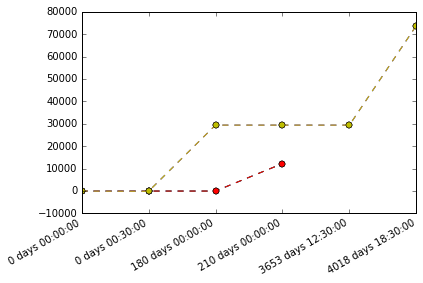

In [22]:
%pylab inline
plandf.utils.humanize(comparison).fillna(method='bfill').plot(legend=False, marker='o', linestyle='--');

This is a very informative table. Conclusion -- you could get more value in fruits by migration. 

# When scenarios differ:

In [9]:
growing_apples_and_oranges = [

    ('extracting seeds: 1; time: 0.5~2@1h; oranges: 15~30@1.3~2cny; apples: 20~40@500~600jpy',   
        'orange seeds: 200~250; apple seeds: 150~200@0.15~0.3usd'),

    ('planting field: 1; time: 2000~3653.5@24h; day of labor: 1~2; years of care: 7~10',
         'orange trees: 50~60@150~200usd; apple trees: 100~150@200~300eur'),

    ('waiting (for crops to grow): 1; time: 365.25~390@24h; years of waiting: 1~1.2',
         'oranges: 5000~6000@1.3~2cny; apples: 10000@500~600jpy')
]

migrating_to_warmer_latitude = [
    ('time: 6@720h; months of waiting: 6',
         'for right conditions to travel: 1; ability to survive a 30 day travel: 1'),

    ('time: 30@24h; days travelling: 30',
         'bananas: 10000@0.25~3usd; apples: 0@500~600jpy; oranges: 50000@1.3~2cny')
]

Note, we didn't have more scenarios, but if we added our uncertainty, such as

In [10]:
plant = plandf.read(growing_apples_and_oranges, conversion_rates)

In [11]:
plandf.utils.humanize(plant)

,worst,mean,best
0 days 00:00:00,0.000000,0.000000,0.000000
0 days 00:30:00,NaN,NaN,-30.824164
0 days 01:15:00,NaN,-110.315105,NaN
0 days 02:00:00,-195.601300,NaN,NaN
2000 days 00:30:00,NaN,NaN,61661.032866
2365 days 06:30:00,NaN,NaN,115647.775678
2826 days 19:15:00,NaN,44003.078455,NaN
3204 days 10:15:00,NaN,93200.777205,NaN
3653 days 14:00:00,29356.387672,NaN,NaN
4043 days 14:00:00,73817.796692,NaN,NaN


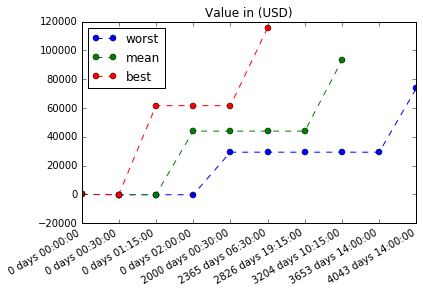

In [19]:
plandf.utils.humanize(plant).fillna(method='bfill').plot(title='Value in (USD)', marker='o', linestyle='--')

In [13]:
migrate = plandf.read(migrating_to_warmer_latitude, conversion_rates)

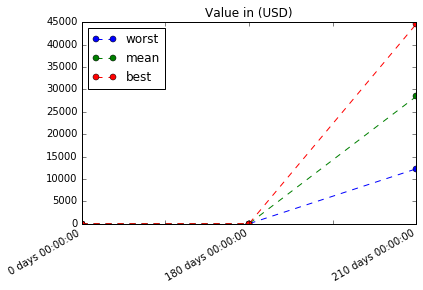

In [20]:
plandf.utils.humanize(migrate).fillna(method='bfill').plot(title='Value in (USD)', marker='o', linestyle='--')

In [15]:
compare = pd.concat({'plant': plant,
           'migrate': migrate}, axis=1)

In [16]:
compare

migrate                                  plant               \
               worst         mean         best        worst         mean   
time                                                                       
0.00        0.000000     0.000000     0.000000     0.000000     0.000000   
0.50             NaN          NaN          NaN          NaN          NaN   
1.25             NaN          NaN          NaN          NaN    -4.412604   
2.00             NaN          NaN          NaN    -7.824052          NaN   
4320.00     0.000000     0.000000     0.000000          NaN          NaN   
5040.00   490.353289  1137.413746  1784.474202          NaN          NaN   
48000.50         NaN          NaN          NaN          NaN          NaN   
56766.50         NaN          NaN          NaN          NaN          NaN   
67843.25         NaN          NaN          NaN          NaN  1760.123138   
76906.25         NaN          NaN          NaN          NaN  3728.031088   
87686.00         NaN          NaN          NaN  1174.255507          NaN   
97046.00         NaN          NaN          NaN  2952.711868          NaN   

                       
                 best  
time                   
0.00         0.000000  
0.50        -1.232967  
1.25              NaN  
2.00              NaN  
4320.00           NaN  
5040.00           NaN  
48000.50  2466.441315  
56766.50  4625.911027  
67843.25          NaN  
76906.25          NaN  
87686.00          NaN  
97046.00          NaN

In [17]:
plandf.utils.humanize(compare)

migrate                                     plant  \
                           worst          mean          best         worst   
0 days 00:00:00         0.000000      0.000000      0.000000      0.000000   
0 days 00:30:00              NaN           NaN           NaN           NaN   
0 days 01:15:00              NaN           NaN           NaN           NaN   
0 days 02:00:00              NaN           NaN           NaN   -195.601300   
180 days 00:00:00       0.000000      0.000000      0.000000           NaN   
210 days 00:00:00   12258.832217  28435.343639  44611.855061           NaN   
2000 days 00:30:00           NaN           NaN           NaN           NaN   
2365 days 06:30:00           NaN           NaN           NaN           NaN   
2826 days 19:15:00           NaN           NaN           NaN           NaN   
3204 days 10:15:00           NaN           NaN           NaN           NaN   
3653 days 14:00:00           NaN           NaN           NaN  29356.387672   
4043 days 14:00:00           NaN           NaN           NaN  73817.796692   

                                                 
                            mean           best  
0 days 00:00:00         0.000000       0.000000  
0 days 00:30:00              NaN     -30.824164  
0 days 01:15:00      -110.315105            NaN  
0 days 02:00:00              NaN            NaN  
180 days 00:00:00            NaN            NaN  
210 days 00:00:00            NaN            NaN  
2000 days 00:30:00           NaN   61661.032866  
2365 days 06:30:00           NaN  115647.775678  
2826 days 19:15:00  44003.078455            NaN  
3204 days 10:15:00  93200.777205            NaN  
3653 days 14:00:00           NaN            NaN  
4043 days 14:00:00           NaN            NaN

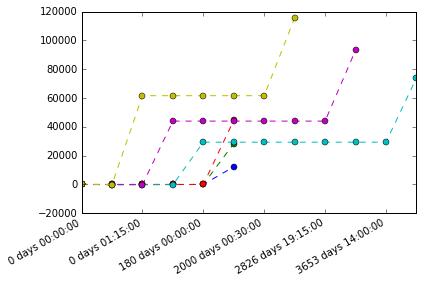

In [21]:
plandf.utils.humanize(compare).fillna(method='bfill').plot(legend=False, marker='o', linestyle='--')